In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


## EDA

In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

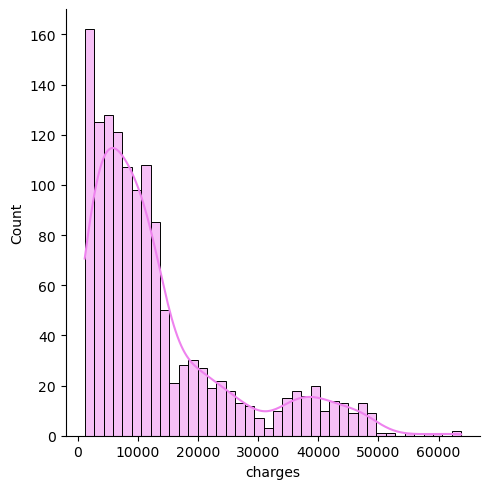

In [6]:
sns.displot(df['charges'], color="violet", bins = 40, kde = True)
plt.show()

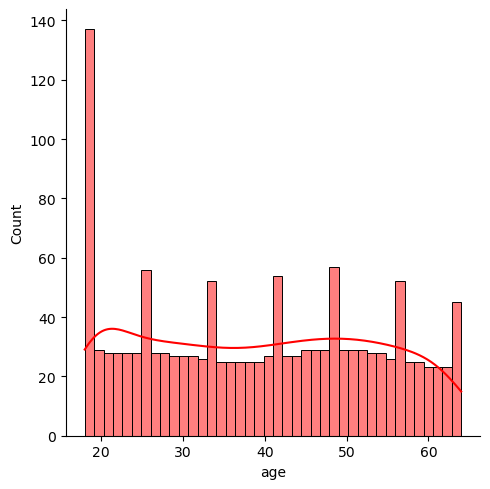

In [7]:
sns.displot(df['age'], color="red", bins = 40, kde = True)
plt.show()

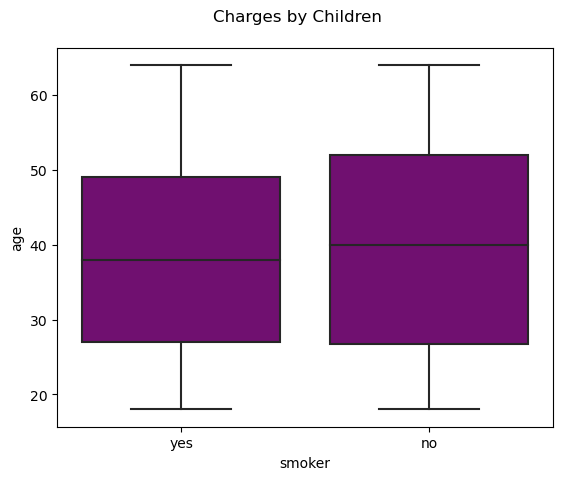

In [8]:
sns.boxplot(data = df, y = 'age', color="purple", x = 'smoker') 
plt.subplots_adjust(top=0.9)
plt.suptitle("Charges by Children")
plt.show()

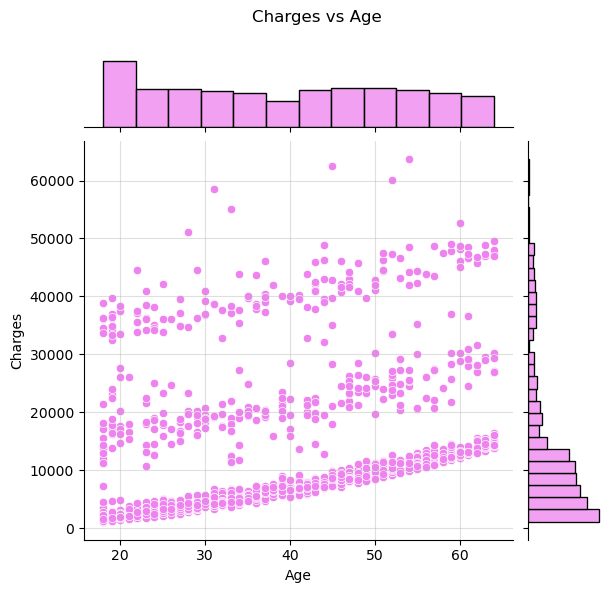

In [9]:
sns.jointplot(data = df,y = "charges", x = "age", color="violet")
plt.subplots_adjust(top=0.9)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid(alpha = 0.4)
plt.suptitle("Charges vs Age")
plt.show()

There are three distinct parts, Lets dive deeper and see what is causing this

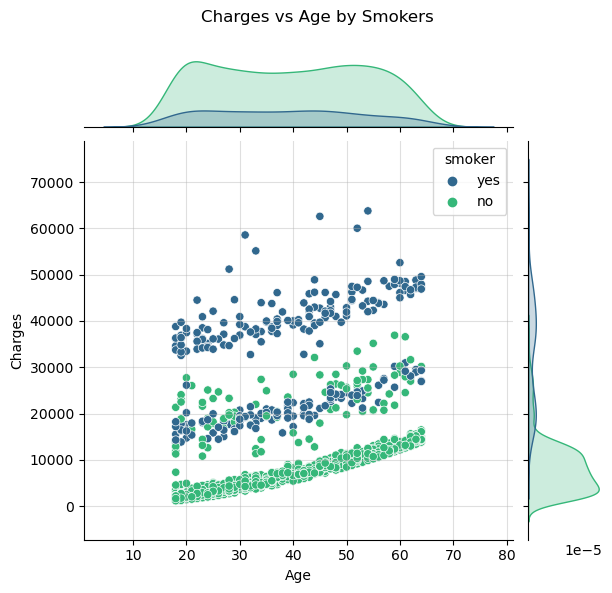

In [10]:
sns.jointplot(data = df,y = "charges", x = "age", palette="viridis", hue = 'smoker')

plt.subplots_adjust(top=0.9)
plt.suptitle("Charges vs Age by Smokers")

plt.grid(alpha = 0.4)

plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Now we see that smoking is a key factor to determine the charges 

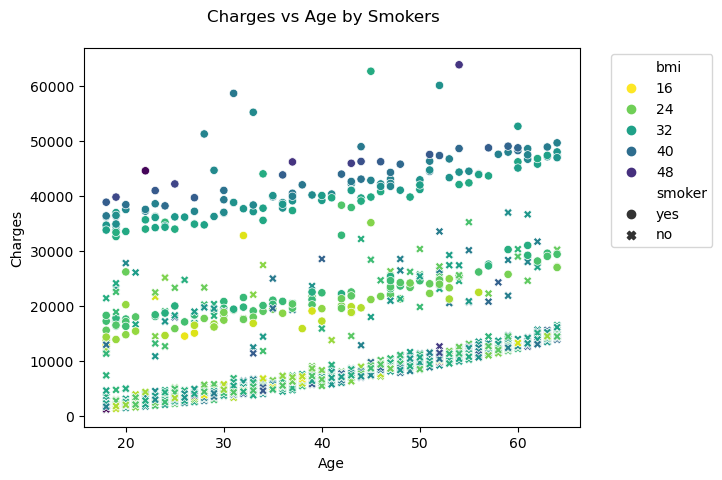

In [11]:
sns.scatterplot(data = df, x = "age", y = "charges", style = "smoker", hue = "bmi", palette = "viridis_r")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplots_adjust(top=0.9)
plt.suptitle("Charges vs Age by Smokers")
plt.xlabel("Age")
plt.ylabel("Charges")

plt.show()

Further we see for higher bmis with smoking personal charges goes higher!

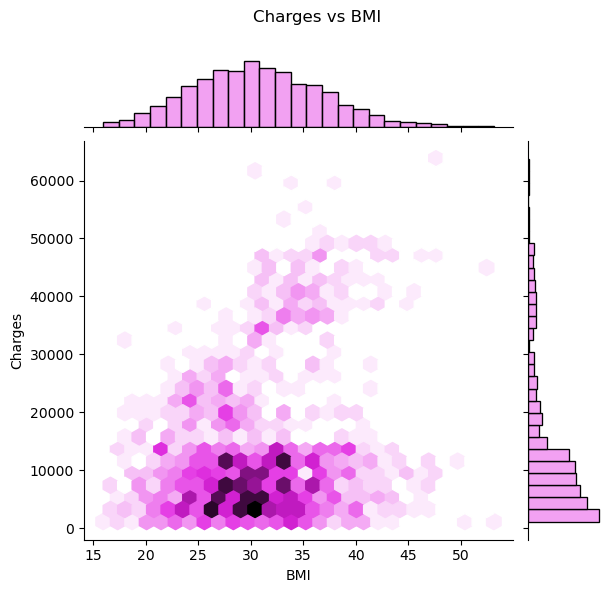

In [12]:
sns.jointplot(x = "bmi", y = "charges", data = df, kind ="hex",color="violet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.9)
plt.suptitle("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

bmi with charges the brighter the hexagon more is the count!

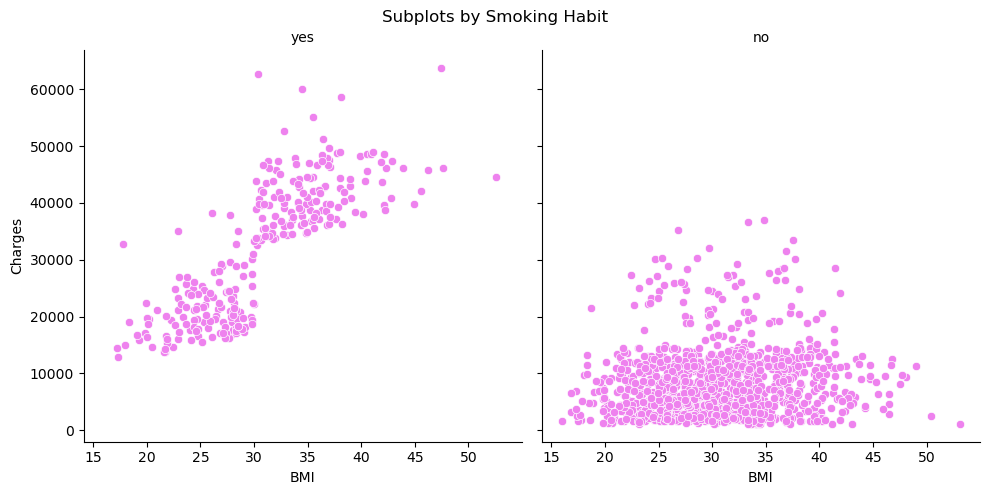

In [13]:
g = sns.FacetGrid(df, col="smoker", height=5, aspect=1)

g.map(sns.scatterplot, "bmi", "charges", color = "violet")

g.set_titles(col_template="{col_name}")
g.set_axis_labels("BMI", "Charges")

sns.despine()

plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots by Smoking Habit")

plt.show()

As BMI increases, there is a `linear correlation` with an increase in smoking behavior, resulting in higher charges or costs associated with smoking.

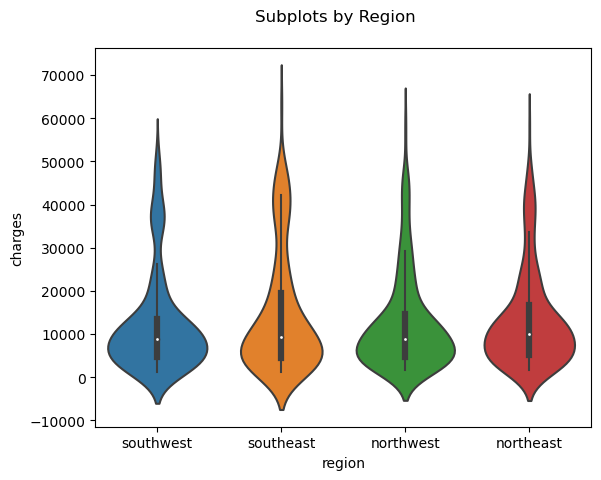

In [14]:
sns.violinplot(data = df, x = "region", y = "charges")
plt.subplots_adjust(top=0.9)
plt.suptitle("Subplots by Region")
plt.show()

Not so much difference in charges for different regions

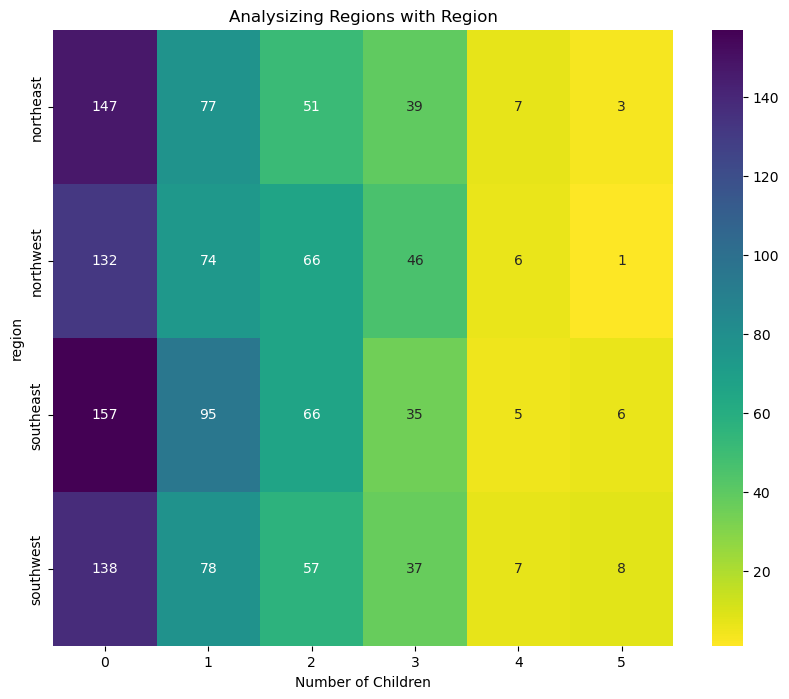

In [15]:
counts = df.groupby(['region', 'children']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(counts, annot=True, fmt="d", cmap="viridis_r")
plt.title("Analysizing Regions with Region")
plt.xlabel("Number of Children")
plt.show()

Even distribution of number of children across various region

In [16]:
# charges_by_regions = df.groupby(['region', 'children'])[["age","bmi","charges"]].median().unstack(fill_value = 0)['charges']
# charges_by_regions

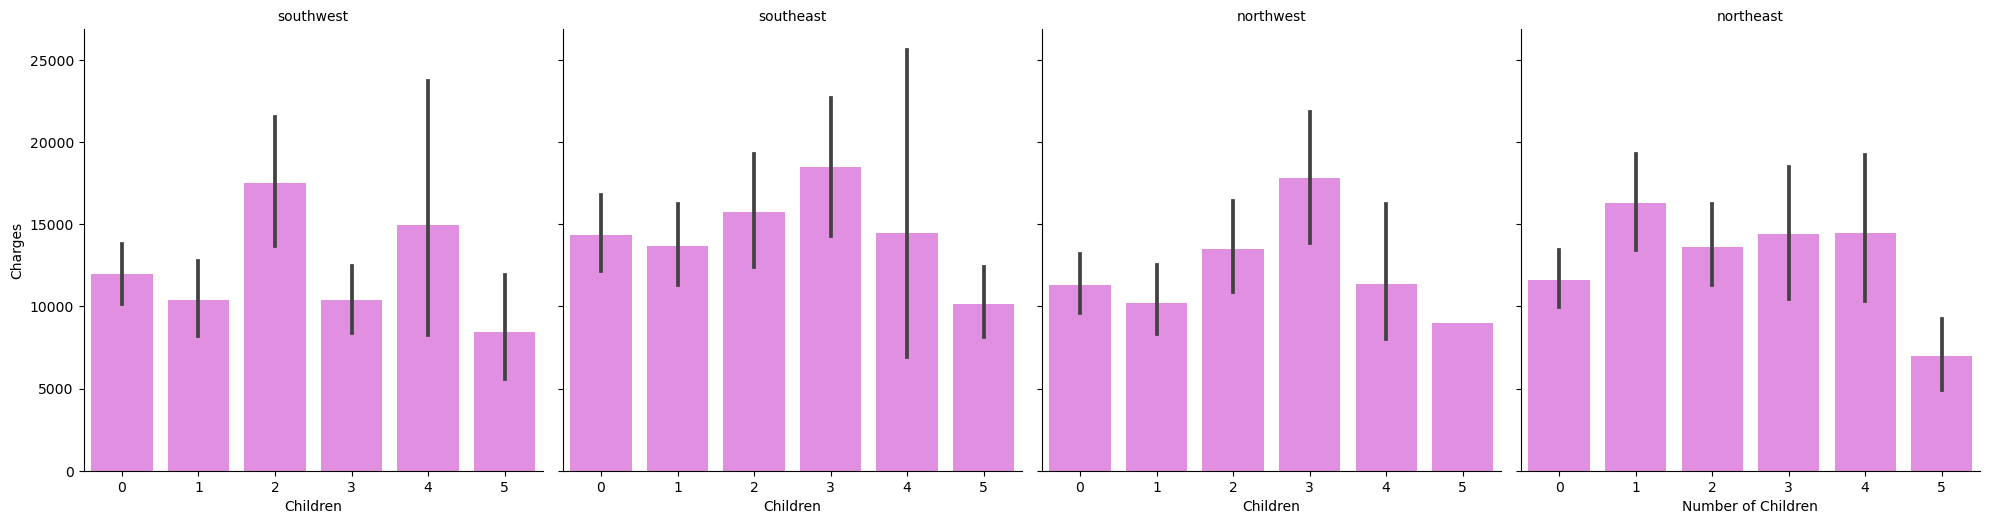

In [17]:
g = sns.FacetGrid(df, col="region", height=5, aspect=1)
g.map(sns.barplot, "children", "charges", color = "violet", order=[0, 1, 2, 3, 4, 5])
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Children", "Charges")
sns.despine()
plt.xlabel("Number of Children")
plt.subplots_adjust(top=1)
plt.show()

There is a similar pattern for charges based on number children in all regions

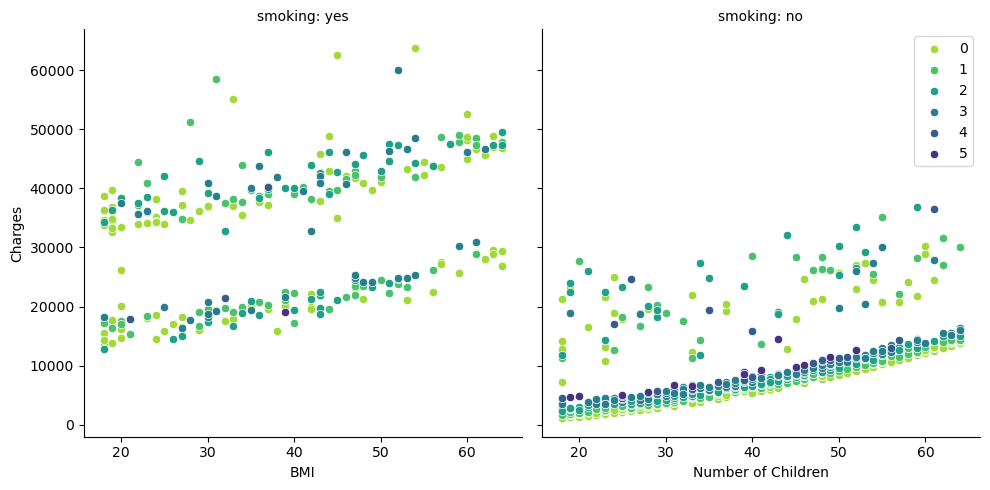

In [18]:
g = sns.FacetGrid(df, col="smoker", hue = "children", height=5, aspect=1, palette = "viridis_r")
g.map(sns.scatterplot, "age", "charges")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("BMI", "Charges")
sns.despine()
plt.legend()
plt.xlabel("Number of Children")
#plt.subplots_adjust(top=1)
#g.set_title("Analysizing Regions with Children by Smoking Habit")
g.set_titles("smoking: {col_name}")
plt.show()

Higher the number of children more is the charge this clearnly evident in the non-smoker groupIn the non-smoker group, there is a clear correlation between having a higher number of children and increased charges or costs.

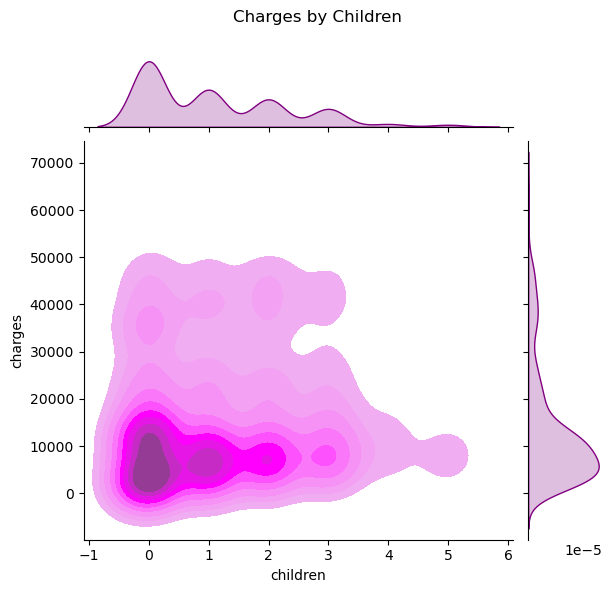

In [19]:
sns.jointplot(data = df, x = 'children', y = 'charges',kind = "kde", color="purple", fill =  True) 
plt.subplots_adjust(top=0.9)
plt.suptitle("Charges by Children")
plt.show()

There are two distinct group 

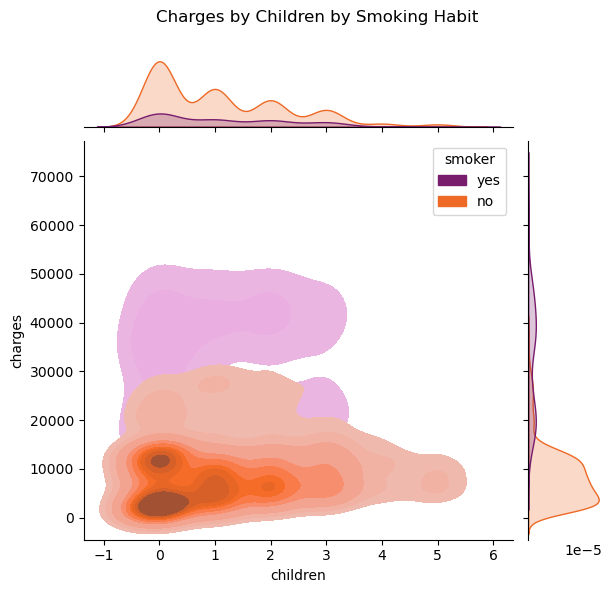

In [20]:
sns.jointplot(data = df, x = 'children', y = 'charges',kind = "kde", hue = "smoker",color="purple", fill =  True, palette = "inferno") 
plt.subplots_adjust(top=0.9)
plt.suptitle("Charges by Children by Smoking Habit")
plt.show()

As suspected the above cluster are the smoker parents most of them dont have kids more than 3

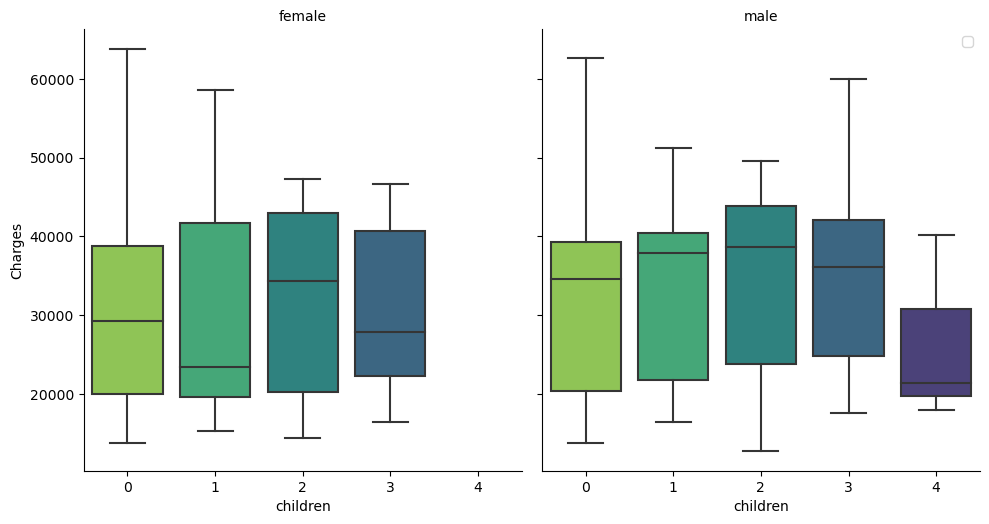

In [21]:
g = sns.FacetGrid( df[df['smoker'] == 'yes'], col="sex", height=5, aspect=1)

g.map(sns.boxplot, "children", "charges", order=range(0,5),palette="viridis_r")

g.set_titles(col_template="{col_name}")
g.set_axis_labels("children", "Charges")
plt.legend()
sns.despine()
plt.subplots_adjust(top=1)
plt.show()


Males have a higher charges relative to females

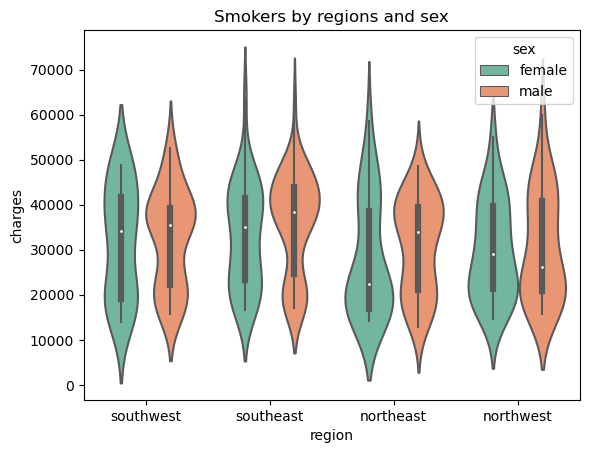

In [22]:
sns.violinplot(data= df[df['smoker'] == 'yes'], x="region", y="charges", hue="sex", palette = 'Set2')
plt.title("Smokers by regions and sex")
plt.show()

For Northeast region female smokers have lesser charge than male

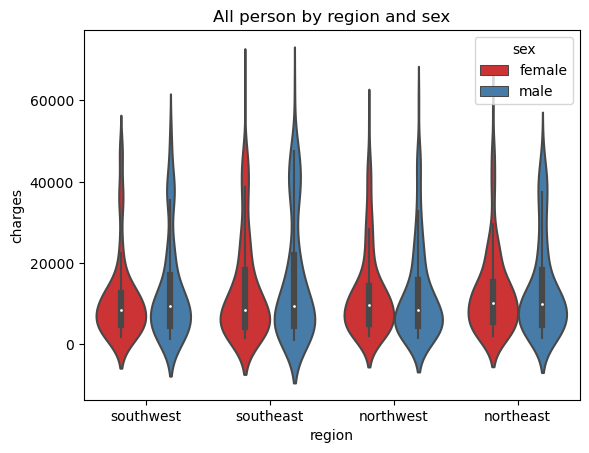

In [23]:
sns.violinplot(data=df, x="region", y="charges", hue="sex", palette = 'Set1')
plt.title("All person by region and sex")
plt.show()

Not much difference between person by region and sex

## Data Preprocessing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
X = df.drop(['charges'], axis = 1)

In [27]:
y = df['charges']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
X_train

,age,sex,bmi,children,smoker,region
1046,43,female,25.080,0,no,northeast
682,39,male,35.300,2,yes,southwest
1037,45,female,30.495,1,yes,northwest
490,19,female,32.900,0,no,southwest
39,60,male,39.900,0,yes,southwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [30]:
numerical_columns = ['age','bmi']
categorical_columns = ['sex','children','smoker','region']

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(sparse_output = False, drop = "if_binary"), categorical_columns)
    ])


X_train = preprocessor.fit_transform(X_train)

## Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
linear_model = LinearRegression()

In [34]:
results = linear_model.fit(X_train, y_train)

In [35]:
print("R^2 Score:", linear_model.score(X_train, y_train))
print("Intercept:", linear_model.intercept_)
print("Coefficients:", linear_model.coef_)

R^2 Score: 0.7468576397172051
Intercept: 8895.03941354117
Coefficients: [ 3725.67226108  2069.70202363   109.03927998 -1042.90984206
  -570.46363357   316.56960342  -559.23852199  2125.96374093
  -269.92134672 23722.41117748   539.08375521   145.22644356
  -384.6505896   -299.65960916]


In [36]:
X_test = preprocessor.fit_transform(X_test)

In [37]:
y_predict = linear_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared error: {mse}" )
print(f"R squared: {r2}" )

Mean Squared error: 35101246.319896415
R squared: 0.7604740609508065
